In [2]:
# a template from streamlit docs on how to create an app with multiple tabs:
import streamlit as st

tab1, tab2, tab3 = st.tabs(["Cat", "Dog", "Owl"])

with tab1:
   st.header("A cat")
   st.image("https://static.streamlit.io/examples/cat.jpg", width=200)

with tab2:
   st.header("A dog")
   st.image("https://static.streamlit.io/examples/dog.jpg", width=200)

with tab3:
   st.header("An owl")
   st.image("https://static.streamlit.io/examples/owl.jpg", width=200)

2024-01-22 22:03:18.056 
  command:

    streamlit run c:\Users\tyler\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


Begin app work:

In [3]:
st.__version__

'1.14.1'

In [9]:
# installs and imports
import streamlit as st
import shap
from shap import TreeExplainer
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [70]:
# check shap version
shap.__version__

'0.43.0'

In [ ]:
# source a script
# call script directly from github or in some other way, if possible
# os.system('python https://raw.githubusercontent.com/runstats21/college-score-card-analysis/main/CollegeScorecard-CollectClean.ipynb')

In [6]:
# import data
X_filled = pd.read_csv("./saved_data/X_filled.csv",index_col="School Name")
# eventually, will call DataCollectClean script, which will produced these csvs,
# and then will read them in as done here

# import train and test data
Xtrain_filled = pd.read_csv("./saved_data/Xtrain_filled.csv",index_col="School Name")
ytrain = pd.read_csv("./saved_data/ytrain.csv",index_col="School Name").squeeze()
Xtest_filled = pd.read_csv("./saved_data/Xtest_filled.csv",index_col="School Name") # note: filled test set is from Xtest0
ytest0 = pd.read_csv("./saved_data/ytest.csv",index_col="School Name").squeeze()

# 10 year post entry data
X_filled10 = pd.read_csv("./saved_data/X_filled10.csv",index_col="School Name")
Xtrain_filled10 = pd.read_csv("./saved_data/Xtrain_filled10.csv",index_col="School Name")
ytrain10 = pd.read_csv("./saved_data/ytrain10.csv",index_col="School Name").squeeze()
Xtest_filled10 = pd.read_csv("./saved_data/Xtest_filled10.csv",index_col="School Name") # note: filled test set is from Xtest0
ytest10 = pd.read_csv("./saved_data/ytest10.csv",index_col="School Name").squeeze()

In [7]:
# train chosen model(s)
rf = RandomForestRegressor(n_estimators=200, criterion='squared_error',max_features='sqrt').fit(Xtrain_filled,ytrain)
rf10 = RandomForestRegressor(n_estimators=200, criterion='squared_error',max_features='sqrt').fit(Xtrain_filled10,ytrain10)

In [8]:
# get shap values
explainer = TreeExplainer(rf)
explainer10 = TreeExplainer(rf10)
shap_values = explainer(X_filled) # get shap values for all colleges
shap_values10 = explainer(X_filled10) # get shap values for all colleges

In [11]:
# save shap values as pickles
fileObj = open('./saved_data/shap_values6.obj', 'wb')
pickle.dump(shap_values,fileObj)
fileObj.close()

fileObj10 = open('./saved_data/shap_values10.obj', 'wb')
pickle.dump(shap_values10,fileObj10)
fileObj10.close()

In [13]:
file_name = "./saved_data/shap_values10.obj"

fileObj = open(file_name,'rb')
shap_values10_new = pickle.load(fileObj)
fileObj.close()

In [38]:
# app build
st.title("Interpreting College ROI") # SHAP Feature importance and scatter plots

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [6]:
X_filled.columns.sort_values()

Index(['Admission Rate (%)', 'Attendance Cost', 'CompletionRate150',
       'Faculty Average Salary', 'Full-time Faculty Rate (%)', 'RetentionRate',
       'SAT Average', 'Student Enrollment Size', 'x0_Private ForProfit',
       'x0_Private NonProfit', 'x0_Public'],
      dtype='object')

In [16]:
disp_feat = st.selectbox('Select a feature to display', options=X_filled.columns)
st.subheader(f'Scatterplot of {disp_feat} Contribution\n(SHAP scatterplot)')
shap.plots.scatter(shap_values10_new[:, f'{disp_feat}'],show=False)
plt.ylabel("Expected Income Contribution")
st.pyplot(plt.gcf())

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

Text(0.5, 0, 'Average impact on model output magnitude\n(mean(|SHAP value|))')

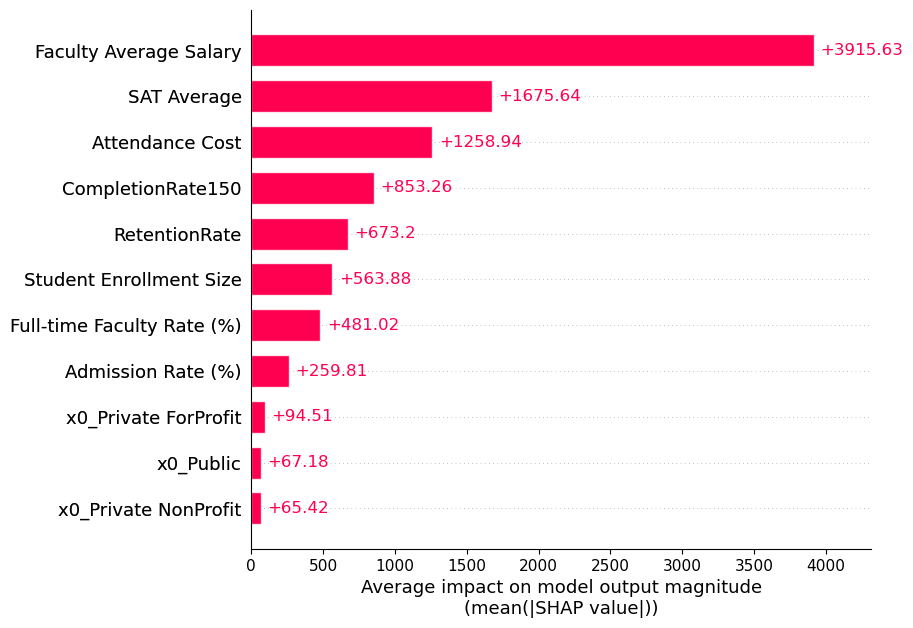

In [52]:
# feature importance plot
st.header('Feature Importance')
shap.plots.bar(shap_values,max_display = 15,show=False)
# shap.summary_plot(shap_values,plot_type = 'bar',show=False)
# as stated in documentation, setting show to false allows for further customization
# https://shap.readthedocs.io/en/latest/generated/shap.plots.bar.html
fig = plt.gca()
fig.set_xlabel("Average impact on model output magnitude\n(mean(|SHAP value|))")
# FIXME: change model output to 6 or 10 year income

In [ ]:
# example code to make plot into a function, and then be able to cache it
# @st.cache(hash_funcs={matplotlib.figure.Figure: lambda _: None})
# def summary_plot_all():
#     fig, axes = plt.subplots(nrows=1, ncols=1)
#     shap.summary_plot(shapvs[1], prep_train.iloc[:, :-1].values, 
#     prep_train.columns, max_display=50)
#     return fig

In [ ]:
# could also paste actually mean income metric(s) below graph showing expected income
## this metric of course is a function of completion rate, for students yet to complete will likely not have job
## and will not be included, as this data is "working not enrolled" 6 or 10 years post entry

In [ ]:
# could be cool addition: Cohort bar plot
# by
# sex = [
#     "Women" if shap_values[i, "Sex"].data == 0 else "Men"
#     for i in range(shap_values.shape[0])
# ]
# shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))

In [19]:
outcome_test = 10

10


In [20]:
school_inds = X_filled.index if outcome_test == 6 else X_filled10.index
print(len(school_inds))

1716


In [21]:
school_inds.sort_values()

Index(['AI Miami International University of Art and Design',
       'Abilene Christian University', 'Academy College',
       'Academy of Art University', 'Adams State University',
       'Adelphi University', 'Adrian College', 'AdventHealth University',
       'Agnes Scott College', 'Alabama A & M University',
       ...
       'Xavier University of Louisiana', 'Yale University',
       'Yeshiva Gedolah Imrei Yosef D'spinka', 'Yeshiva University',
       'Yeshiva of Nitra Rabbinical College', 'Yeshivath Viznitz',
       'York College', 'York College of Pennsylvania', 'Young Harris College',
       'Youngstown State University'],
      dtype='object', name='School Name', length=1716)